In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# from statannotations.Annotator import Annotator

import json

In [97]:
cartography_majority = pd.read_csv('./results/cartography_majority.csv')
cartography_majority.head()

,text_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1,White people are trash.,0.745260,0.128753,0.886104,0.092564,0.032084,0.065327,0.162176,0.102956,0.048569,0.0,0,1.000000,0.745260,0.128753,0.886104,True,1.0
1,2,"You've caught the big gay, it's known to be ai...",0.556444,0.281930,0.175616,0.183405,0.110352,0.333001,0.260152,0.173061,0.491384,2.0,2,0.666667,0.260152,0.173061,0.491384,True,0.8
2,3,"I'm not saying you said that, I'm just saying ...",0.617450,0.347467,0.124935,0.183114,0.211666,0.534547,0.199437,0.159404,0.340518,1.0,1,0.666667,0.183114,0.211666,0.534547,True,0.8
3,4,Donald Trump. Yeet myself off a building onto ...,0.508655,0.233640,0.265622,0.168942,0.095517,0.237798,0.322403,0.148581,0.496580,1.0,2,0.500000,0.168942,0.095517,0.237798,False,0.6
4,5,Fabrice Fabrice is ostensibly black or black/l...,0.924635,0.071086,0.990208,0.045497,0.037169,0.007382,0.029868,0.034223,0.002410,0.0,0,1.000000,0.924635,0.071086,0.990208,True,1.0


In [98]:
cartography_majority.rename(columns={'text_id': 'comment_id'}, inplace=True)
cartography_majority.head()

,comment_id,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,label_2_std,label_2_last,label,pred,annotator_agreement_factor,confidence,variability,correctness,is_correct,agreement_factor_rd
0,1,White people are trash.,0.745260,0.128753,0.886104,0.092564,0.032084,0.065327,0.162176,0.102956,0.048569,0.0,0,1.000000,0.745260,0.128753,0.886104,True,1.0
1,2,"You've caught the big gay, it's known to be ai...",0.556444,0.281930,0.175616,0.183405,0.110352,0.333001,0.260152,0.173061,0.491384,2.0,2,0.666667,0.260152,0.173061,0.491384,True,0.8
2,3,"I'm not saying you said that, I'm just saying ...",0.617450,0.347467,0.124935,0.183114,0.211666,0.534547,0.199437,0.159404,0.340518,1.0,1,0.666667,0.183114,0.211666,0.534547,True,0.8
3,4,Donald Trump. Yeet myself off a building onto ...,0.508655,0.233640,0.265622,0.168942,0.095517,0.237798,0.322403,0.148581,0.496580,1.0,2,0.500000,0.168942,0.095517,0.237798,False,0.6
4,5,Fabrice Fabrice is ostensibly black or black/l...,0.924635,0.071086,0.990208,0.045497,0.037169,0.007382,0.029868,0.034223,0.002410,0.0,0,1.000000,0.924635,0.071086,0.990208,True,1.0


In [53]:
len(cartography_majority)

31652

In [99]:
train_values_df = pd.read_csv('./results/train_values_disco.csv')
train_values_df.head()

,text_id,annotator_id,label_0,label_1,label_2,pred_label_0,pred_label_1,pred_label_2,epoch_no
0,39509.0,889.0,1.0,0.0,0.0,0.300618,0.380915,0.318468,1.0
1,39491.0,2145.0,1.0,0.0,0.0,0.299168,0.333526,0.367306,1.0
2,18273.0,6193.0,0.0,1.0,0.0,0.301107,0.314399,0.384494,1.0
3,14356.0,1624.0,1.0,0.0,0.0,0.306814,0.353492,0.339694,1.0
4,39490.0,152.0,0.0,0.0,1.0,0.305592,0.305830,0.388578,1.0


In [100]:
train_values_df['text_id'].nunique()

31652

In [101]:
train_values_df['text_id'] = train_values_df['text_id'].astype(int)
train_values_df['annotator_id'] = train_values_df['annotator_id'].astype(int)

In [102]:
train_values_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560985 entries, 0 to 560984
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   text_id       560985 non-null  int64  
 1   annotator_id  560985 non-null  int64  
 2   label_0       560985 non-null  float64
 3   label_1       560985 non-null  float64
 4   label_2       560985 non-null  float64
 5   pred_label_0  560985 non-null  float64
 6   pred_label_1  560985 non-null  float64
 7   pred_label_2  560985 non-null  float64
 8   epoch_no      560985 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 38.5 MB


In [103]:
with open('../../data/kennedy/kennedy_train.json', 'r') as file:
    data = json.load(file)

In [104]:
data['columns']

['comment_id',
 'annotator_id',
 'text',
 'hate_speech_score',
 'hatespeech',
 'label',
 'label_vector',
 'message',
 'Aindex',
 'Mindex']

In [105]:
full_df = pd.DataFrame(data['data'])
full_df.columns = data['columns']

In [106]:
train_values_df['text_id'] = train_values_df['text_id'].astype(int)
train_values_df['annotator_id'] = train_values_df['annotator_id'].astype(int)

In [107]:
merged_df = pd.merge(train_values_df, full_df[['comment_id', 'annotator_id', 'text', 'hate_speech_score', 'hatespeech', 'label', 'label_vector', 'message', 'Aindex', 'Mindex']], how='left', left_on=['annotator_id', 'text_id'], right_on=['Aindex', 'Mindex'])
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,label_2,pred_label_0,pred_label_1,pred_label_2,epoch_no,comment_id,annotator_id_y,text,hate_speech_score,hatespeech,label,label_vector,message,Aindex,Mindex
0,39509,889,1.0,0.0,0.0,0.300618,0.380915,0.318468,1.0,20024,7838,"Yes, in barbaric, authoritarian cultures that ...",-0.94,0.0,0.0,0,"Yes, in barbaric, authoritarian cultures that ...",889,39509
1,39491,2145,1.0,0.0,0.0,0.299168,0.333526,0.367306,1.0,20068,3995,trump is the only jews true friend. I hope tru...,2.66,0.0,0.0,0,trump is the only jews true friend. I hope tru...,2145,39491
2,18273,6193,0.0,1.0,0.0,0.301107,0.314399,0.384494,1.0,28712,7793,Girls are trash,0.74,1.0,1.0,1,Girls are trash,6193,18273
3,14356,1624,1.0,0.0,0.0,0.306814,0.353492,0.339694,1.0,27322,2072,"hi, i need straight girl friends bc who else i...",-2.83,0.0,0.0,0,"hi, i need straight girl friends bc who else i...",1624,14356
4,39490,152,0.0,0.0,1.0,0.305592,0.305830,0.388578,1.0,20057,911,"This is why we won, because Americans know tha...",2.97,2.0,2.0,2,"This is why we won, because Americans know tha...",152,39490


In [108]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560985 entries, 0 to 560984
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   text_id            560985 non-null  int64  
 1   annotator_id_x     560985 non-null  int64  
 2   label_0            560985 non-null  float64
 3   label_1            560985 non-null  float64
 4   label_2            560985 non-null  float64
 5   pred_label_0       560985 non-null  float64
 6   pred_label_1       560985 non-null  float64
 7   pred_label_2       560985 non-null  float64
 8   epoch_no           560985 non-null  float64
 9   comment_id         560985 non-null  int64  
 10  annotator_id_y     560985 non-null  int64  
 11  text               560985 non-null  object 
 12  hate_speech_score  560985 non-null  float64
 13  hatespeech         560985 non-null  float64
 14  label              560985 non-null  float64
 15  label_vector       560985 non-null  int64  
 16  me

In [109]:
def get_pred(label_0, label_1, label_2):
    if label_0 > label_1 and label_0 > label_2:
        return 0
    elif label_1 > label_0 and label_1 > label_2:
        return 1
    else:
        return 2

In [110]:
merged_df['pred'] = merged_df.apply(lambda row: get_pred(row.pred_label_0, row.pred_label_1, row.pred_label_2), axis=1)
merged_df.head()

,text_id,annotator_id_x,label_0,label_1,label_2,pred_label_0,pred_label_1,pred_label_2,epoch_no,comment_id,annotator_id_y,text,hate_speech_score,hatespeech,label,label_vector,message,Aindex,Mindex,pred
0,39509,889,1.0,0.0,0.0,0.300618,0.380915,0.318468,1.0,20024,7838,"Yes, in barbaric, authoritarian cultures that ...",-0.94,0.0,0.0,0,"Yes, in barbaric, authoritarian cultures that ...",889,39509,1
1,39491,2145,1.0,0.0,0.0,0.299168,0.333526,0.367306,1.0,20068,3995,trump is the only jews true friend. I hope tru...,2.66,0.0,0.0,0,trump is the only jews true friend. I hope tru...,2145,39491,2
2,18273,6193,0.0,1.0,0.0,0.301107,0.314399,0.384494,1.0,28712,7793,Girls are trash,0.74,1.0,1.0,1,Girls are trash,6193,18273,2
3,14356,1624,1.0,0.0,0.0,0.306814,0.353492,0.339694,1.0,27322,2072,"hi, i need straight girl friends bc who else i...",-2.83,0.0,0.0,0,"hi, i need straight girl friends bc who else i...",1624,14356,1
4,39490,152,0.0,0.0,1.0,0.305592,0.305830,0.388578,1.0,20057,911,"This is why we won, because Americans know tha...",2.97,2.0,2.0,2,"This is why we won, because Americans know tha...",152,39490,2


In [111]:
merged_df.drop(columns=['text_id', 'annotator_id_x'], inplace=True)
merged_df.rename(columns={'annotator_id_y': 'annotator_id'}, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560985 entries, 0 to 560984
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   label_0            560985 non-null  float64
 1   label_1            560985 non-null  float64
 2   label_2            560985 non-null  float64
 3   pred_label_0       560985 non-null  float64
 4   pred_label_1       560985 non-null  float64
 5   pred_label_2       560985 non-null  float64
 6   epoch_no           560985 non-null  float64
 7   comment_id         560985 non-null  int64  
 8   annotator_id       560985 non-null  int64  
 9   text               560985 non-null  object 
 10  hate_speech_score  560985 non-null  float64
 11  hatespeech         560985 non-null  float64
 12  label              560985 non-null  float64
 13  label_vector       560985 non-null  int64  
 14  message            560985 non-null  object 
 15  Aindex             560985 non-null  int64  
 16  Mi

In [112]:
def get_confidence(label, label_0_mean, label_1_mean, label_2_mean):
    if label == 0:
        return label_0_mean
    elif label == 1:
        return label_1_mean
    else: return label_2_mean
    
def get_variability(label, label_0_std, label_1_std, label_2_std):
    if label == 0:
        return label_0_std
    elif label == 1:
        return label_1_std
    else: return label_2_std

def get_correctness(label, label_0_last, label_1_last, label_2_last):
    if label == 0:
        return label_0_last
    elif label == 1:
        return label_1_last
    else: return label_2_last

In [117]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_df = train_values_df.sort_values(['epoch_no']).groupby(['Aindex', 'Mindex'], as_index=False).agg({'text':'first', 'pred_label_0': metrics, 'pred_label_1': metrics, 'pred_label_2': metrics, 'label': 'first', 'pred': 'last', 'comment_id':'first', 'annotator_id':'first', 'hate_speech_score': 'first'})
    agg_df.columns = ['Aindex', 'Mindex', 'text', 'label_0_mean', 'label_0_std', 'label_0_last', 'label_1_mean', 'label_1_std', 'label_1_last', 'label_2_mean', 'label_2_std', 'label_2_last', 'label', 'pred', 'comment_id', 'annotator_id', 'hate_speech_score']
    
    agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean, row.label_2_mean), axis=1)
    agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std, row.label_2_std), axis=1)
    agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last, row.label_2_last), axis=1)
    agg_df['is_correct'] = np.where((agg_df['label'] == agg_df['pred']), True, False)
    
    return agg_df

In [118]:
cartography_df = build_cartography_df(merged_df)
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,...,label_2_last,label,pred,comment_id,annotator_id,hate_speech_score,confidence,variability,correctness,is_correct
0,0,0,Yes indeed. She sort of reminds me of the elde...,0.979439,0.022946,0.996452,0.016314,0.021729,0.003200,0.004247,...,0.000348,0.0,0,47777,10873,-3.90,0.979439,0.022946,0.996452,True
1,0,6030,"It's that season, when niggas go to jail for n...",0.325298,0.088896,0.284761,0.214807,0.069897,0.322640,0.459894,...,0.392599,1.0,2,22834,10873,-0.42,0.214807,0.069897,0.322640,False
2,0,9125,Funny thing is that you sound exactly like whe...,0.544678,0.130466,0.365480,0.166366,0.063009,0.248666,0.288955,...,0.385855,0.0,2,19104,10873,-1.41,0.544678,0.130466,0.365480,False
3,0,13747,@LenaWaithe @QueenAndSlim Hi watch u on Reggie...,0.884355,0.073728,0.969827,0.092041,0.065868,0.030150,0.023604,...,0.000024,0.0,0,30025,10873,-1.69,0.884355,0.073728,0.969827,True
4,0,15202,"@papillonpsyche gerry and Martin ""mortifying g...",0.837638,0.138334,0.621727,0.094186,0.070495,0.194567,0.068176,...,0.183706,2.0,0,30298,10873,-1.86,0.068176,0.074841,0.183706,False


In [119]:
cartography_df = pd.merge(cartography_df, cartography_majority[['comment_id', 'label', 'annotator_agreement_factor', 'agreement_factor_rd']], how='left', on=['comment_id'])
cartography_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112197 entries, 0 to 112196
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Aindex                      112197 non-null  int64  
 1   Mindex                      112197 non-null  int64  
 2   text                        112197 non-null  object 
 3   label_0_mean                112197 non-null  float64
 4   label_0_std                 112197 non-null  float64
 5   label_0_last                112197 non-null  float64
 6   label_1_mean                112197 non-null  float64
 7   label_1_std                 112197 non-null  float64
 8   label_1_last                112197 non-null  float64
 9   label_2_mean                112197 non-null  float64
 10  label_2_std                 112197 non-null  float64
 11  label_2_last                112197 non-null  float64
 12  label_x                     112197 non-null  float64
 13  pred          

In [120]:
cartography_df.rename(columns={'label_x': 'label', 'label_y': 'majority_label', 'annotator_agreement_factor': 'agreement_factor'}, inplace=True)
cartography_df.head()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,...,comment_id,annotator_id,hate_speech_score,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd
0,0,0,Yes indeed. She sort of reminds me of the elde...,0.979439,0.022946,0.996452,0.016314,0.021729,0.003200,0.004247,...,47777,10873,-3.90,0.979439,0.022946,0.996452,True,0.0,1.00,1.0
1,0,6030,"It's that season, when niggas go to jail for n...",0.325298,0.088896,0.284761,0.214807,0.069897,0.322640,0.459894,...,22834,10873,-0.42,0.214807,0.069897,0.322640,False,2.0,0.60,0.6
2,0,9125,Funny thing is that you sound exactly like whe...,0.544678,0.130466,0.365480,0.166366,0.063009,0.248666,0.288955,...,19104,10873,-1.41,0.544678,0.130466,0.365480,False,0.0,1.00,1.0
3,0,13747,@LenaWaithe @QueenAndSlim Hi watch u on Reggie...,0.884355,0.073728,0.969827,0.092041,0.065868,0.030150,0.023604,...,30025,10873,-1.69,0.884355,0.073728,0.969827,True,0.0,1.00,1.0
4,0,15202,"@papillonpsyche gerry and Martin ""mortifying g...",0.837638,0.138334,0.621727,0.094186,0.070495,0.194567,0.068176,...,30298,10873,-1.86,0.068176,0.074841,0.183706,False,0.0,0.75,0.8


In [122]:
cartography_df['disagrees_with_majority'] = cartography_df.apply(lambda row: row.label != row.majority_label, axis=1)
cartography_df.tail()

,Aindex,Mindex,text,label_0_mean,label_0_std,label_0_last,label_1_mean,label_1_std,label_1_last,label_2_mean,...,annotator_id,hate_speech_score,confidence,variability,correctness,is_correct,majority_label,agreement_factor,agreement_factor_rd,disagrees_with_majority
112192,7911,38075,Christians being the pinnacle of morality. Now...,0.952042,0.103493,0.999961,0.014533,0.030812,0.000035,0.033425,...,10218,-0.48,0.952042,0.103493,0.999961,True,0.0,1.000000,1.0,False
112193,7911,39489,Hitler didn't finish it. Can u. If a nigger ur...,0.030741,0.053343,0.000458,0.028568,0.062110,0.000347,0.940691,...,10218,2.27,0.940691,0.115237,0.999195,True,2.0,0.951444,1.0,False
112194,7911,39504,JEW Get the fuck out of here you jewish son of...,0.009691,0.014094,0.000086,0.004386,0.008949,0.000019,0.985923,...,10218,3.62,0.985923,0.022431,0.999895,True,2.0,0.976687,1.0,False
112195,7911,39509,"Yes, in barbaric, authoritarian cultures that ...",0.973406,0.052976,0.999906,0.008601,0.016559,0.000094,0.017992,...,10218,-0.94,0.973406,0.052976,0.999906,True,0.0,0.918621,1.0,False
112196,7911,39537,It's just really pointless and insulting to pe...,0.993579,0.010944,0.999799,0.003262,0.004809,0.000168,0.003159,...,10218,-2.34,0.993579,0.010944,0.999799,True,0.0,0.947658,1.0,False


In [123]:
cartography_df['annotator_id'].value_counts()

11111    24
3700     24
10961    24
4959     24
10262    24
         ..
5824      4
2768      4
6647      4
6695      3
7558      3
Name: annotator_id, Length: 7912, dtype: int64

In [140]:
cartography_df['comment_id'].value_counts()

20011    815
20002    801
20001    799
20007    796
20014    793
        ... 
20073      1
48602      1
44112      1
11313      1
1167       1
Name: comment_id, Length: 31652, dtype: int64

1. Low confidence in majority -> see their results in multi-annotator
2. High confidence in majority -> see their results in multi-annotator
3. majority label different from multi-annotator label - boxplots
4. Annotators with low f1s

### Task 1

In [124]:
low_confidence_comment_ids = cartography_majority[cartography_majority['confidence'] <= 0.5]['comment_id'].values
len(low_confidence_comment_ids)

7154

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6]),
 [Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.20000000000000004, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5000000000000001, '0.5'),
  Text(0, 0.6000000000000001, '0.6')])

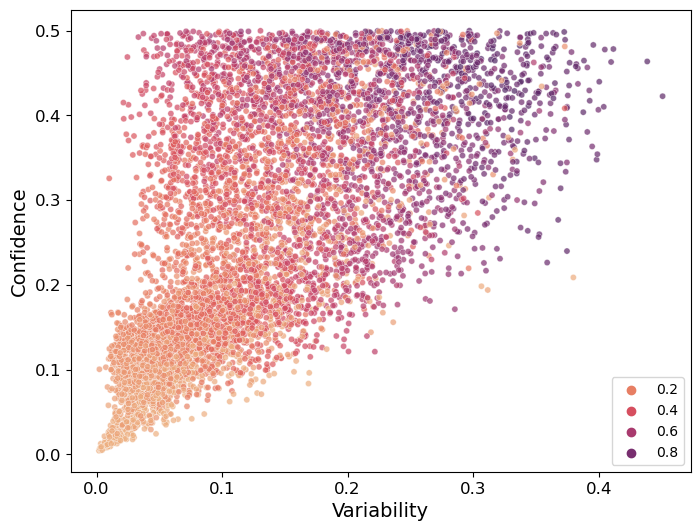

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_majority[cartography_majority['comment_id'].isin(low_confidence_comment_ids)], x="variability", y="confidence", hue='correctness', palette='flare', alpha=0.7, s=20)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.legend(title='Agreement Factor')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [126]:
cartography_df_low_conf_in_majority = cartography_df[cartography_df['comment_id'].isin(low_confidence_comment_ids)]
cartography_df_low_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21885 entries, 12 to 112184
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   21885 non-null  int64  
 1   Mindex                   21885 non-null  int64  
 2   text                     21885 non-null  object 
 3   label_0_mean             21885 non-null  float64
 4   label_0_std              21885 non-null  float64
 5   label_0_last             21885 non-null  float64
 6   label_1_mean             21885 non-null  float64
 7   label_1_std              21885 non-null  float64
 8   label_1_last             21885 non-null  float64
 9   label_2_mean             21885 non-null  float64
 10  label_2_std              21885 non-null  float64
 11  label_2_last             21885 non-null  float64
 12  label                    21885 non-null  float64
 13  pred                     21885 non-null  int64  
 14  comment_id          

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

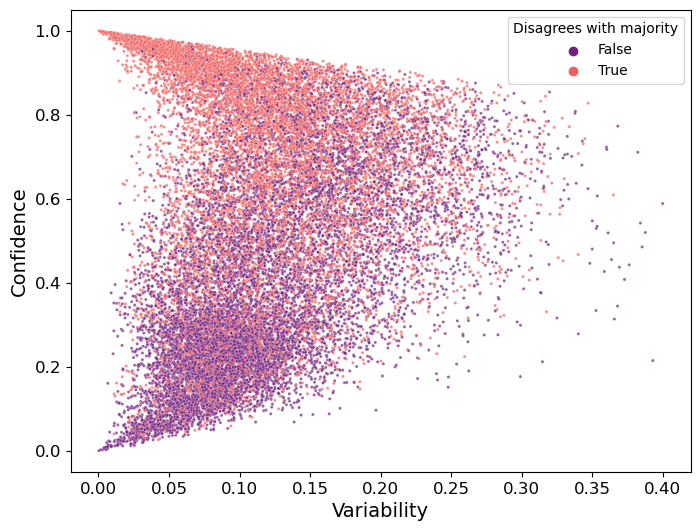

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df_low_conf_in_majority, x="variability", y="confidence", hue='disagrees_with_majority', palette='magma', alpha=0.7, s=5)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Disagrees with majority')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

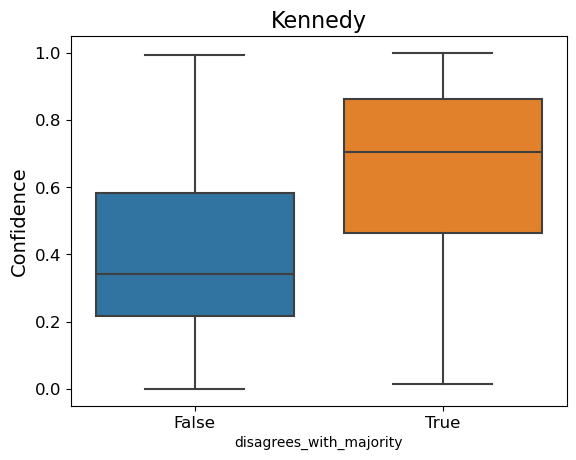

In [142]:
ax = sns.boxplot(data=cartography_df_low_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Kennedy", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

so basically, text samples with low confidence in majority model shows a tred in disco that where the label by annotator disagrees with majority, there's a general trend of higher confidence compared to the labels where the annotator agrees with majority.
Need to look at samples to see if these could be mislabelled samples where the minority annotation is the correct one.

<Axes: xlabel='disagrees_with_majority', ylabel='Count'>

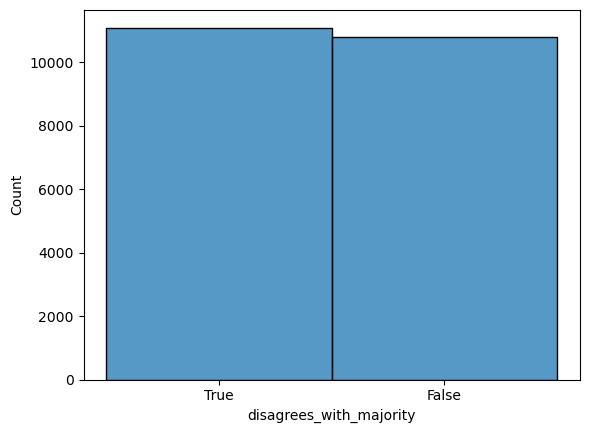

In [129]:
sns.histplot(cartography_df_low_conf_in_majority, x=cartography_df_low_conf_in_majority['disagrees_with_majority'].astype(str))

### Task 2

In [130]:
high_confidence_comment_ids = cartography_majority[cartography_majority['confidence'] > 0.5]['comment_id'].values
cartography_df_high_conf_in_majority = cartography_df[cartography_df['comment_id'].isin(high_confidence_comment_ids)]
cartography_df_high_conf_in_majority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90312 entries, 0 to 112196
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   90312 non-null  int64  
 1   Mindex                   90312 non-null  int64  
 2   text                     90312 non-null  object 
 3   label_0_mean             90312 non-null  float64
 4   label_0_std              90312 non-null  float64
 5   label_0_last             90312 non-null  float64
 6   label_1_mean             90312 non-null  float64
 7   label_1_std              90312 non-null  float64
 8   label_1_last             90312 non-null  float64
 9   label_2_mean             90312 non-null  float64
 10  label_2_std              90312 non-null  float64
 11  label_2_last             90312 non-null  float64
 12  label                    90312 non-null  float64
 13  pred                     90312 non-null  int64  
 14  comment_id           

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

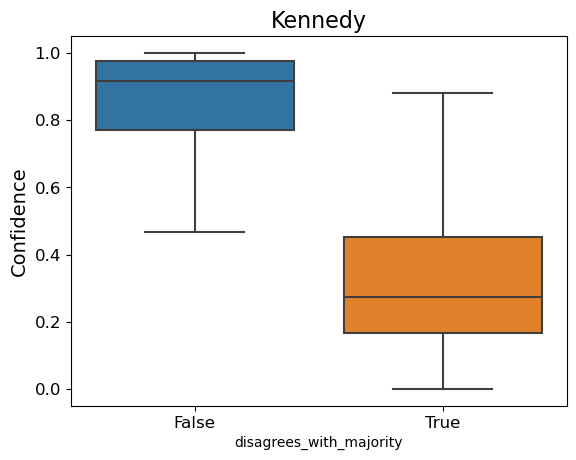

In [143]:
ax = sns.boxplot(data=cartography_df_high_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Kennedy", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Task 3

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

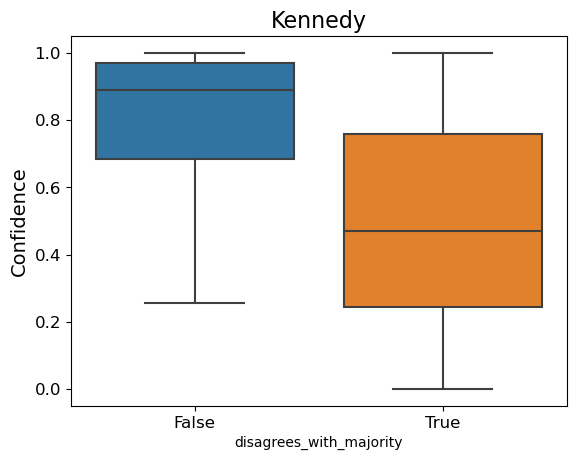

In [144]:
ax = sns.boxplot(data=cartography_df, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Kennedy", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.savefig("./plots/agr_factor_vs_conf.png", dpi=600, bbox_inches='tight')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000'),
  Text(0, 70000.0, '70000'),
  Text(0, 80000.0, '80000'),
  Text(0, 90000.0, '90000')])

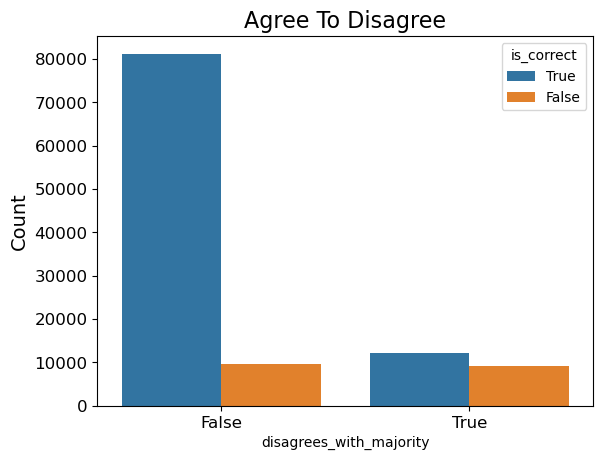

In [133]:
ax = sns.countplot(data=cartography_df, x="disagrees_with_majority", hue=cartography_df["is_correct"].astype(str))

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Task 4

In [145]:
num_unique_annotators = cartography_df['Aindex'].nunique()
print(num_unique_annotators)

7912


In [146]:
f1_weighted = cartography_df.groupby('Aindex').apply(lambda x: f1_score(x['label'], x['pred'], average='weighted'))
f1_macro = cartography_df.groupby('Aindex').apply(lambda x: f1_score(x['label'], x['pred'], average='macro'))
group_counts = cartography_df['Aindex'].value_counts()
annotator_metrics_df = pd.DataFrame({'f1_weighted': f1_weighted, 'f1_macro': f1_macro, 'group_count': group_counts})
annotator_metrics_df.head()

,f1_weighted,f1_macro,group_count
0,0.600000,0.400000,8
1,0.694444,0.611111,18
2,0.886275,0.803922,10
3,0.755639,0.530702,14
4,0.901333,0.653333,15


In [147]:
annotator_metrics_df

,f1_weighted,f1_macro,group_count
0,0.600000,0.400000,8
1,0.694444,0.611111,18
2,0.886275,0.803922,10
3,0.755639,0.530702,14
4,0.901333,0.653333,15
...,...,...,...
7907,1.000000,1.000000,8
7908,1.000000,1.000000,6
7909,0.817460,0.841270,6
7910,0.333333,0.444444,4


In [148]:
annotator_metrics_df.sort_values(['group_count'], ascending=False)

,f1_weighted,f1_macro,group_count
4783,0.709855,0.707826,24
4034,0.872727,0.854545,24
531,0.700000,0.533333,24
1060,0.916667,0.906250,24
3816,0.775000,0.539394,24
...,...,...,...
7582,1.000000,1.000000,4
6218,0.642857,0.428571,4
7641,0.333333,0.444444,4
7252,1.000000,1.000000,3


<Axes: >

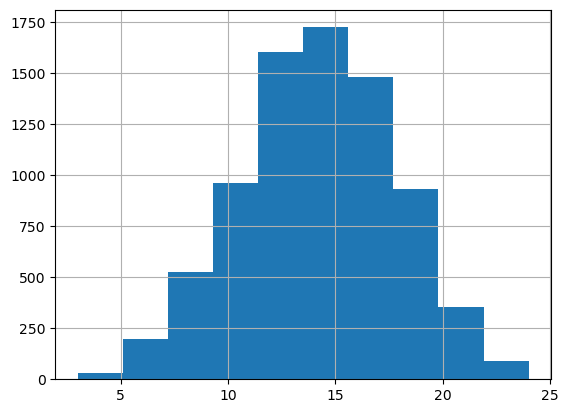

In [151]:
annotator_metrics_df.group_count.hist()

In [152]:
len(annotator_metrics_df[annotator_metrics_df['group_count'] < 10])

757

In [153]:
annotator_metrics_df['group_count'].sum()

112197

In [154]:
annotator_metrics_df[annotator_metrics_df['group_count'] >= 10]['group_count'].sum()

106210

## Repeating the tasks for data with annotators having more than 50 annotations.

In [155]:
annotator_indices = annotator_metrics_df[annotator_metrics_df['group_count'] >= 10]['group_count'].index.values
len(annotator_indices)

7155

In [156]:
annotator_indices

array([   1,    2,    3, ..., 7895, 7897, 7901])

In [157]:
cartography_df_greater_than_10_anots = cartography_df[cartography_df['Aindex'].isin(annotator_indices)]
cartography_df_greater_than_10_anots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106210 entries, 8 to 112125
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Aindex                   106210 non-null  int64  
 1   Mindex                   106210 non-null  int64  
 2   text                     106210 non-null  object 
 3   label_0_mean             106210 non-null  float64
 4   label_0_std              106210 non-null  float64
 5   label_0_last             106210 non-null  float64
 6   label_1_mean             106210 non-null  float64
 7   label_1_std              106210 non-null  float64
 8   label_1_last             106210 non-null  float64
 9   label_2_mean             106210 non-null  float64
 10  label_2_std              106210 non-null  float64
 11  label_2_last             106210 non-null  float64
 12  label                    106210 non-null  float64
 13  pred                     106210 non-null  int64  
 14  comm

### Task 1

In [158]:
cartography_df_low_conf_in_majority = cartography_df_greater_than_10_anots[cartography_df_greater_than_10_anots['comment_id'].isin(low_confidence_comment_ids)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20766 entries, 12 to 112085
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Aindex                   20766 non-null  int64  
 1   Mindex                   20766 non-null  int64  
 2   text                     20766 non-null  object 
 3   label_0_mean             20766 non-null  float64
 4   label_0_std              20766 non-null  float64
 5   label_0_last             20766 non-null  float64
 6   label_1_mean             20766 non-null  float64
 7   label_1_std              20766 non-null  float64
 8   label_1_last             20766 non-null  float64
 9   label_2_mean             20766 non-null  float64
 10  label_2_std              20766 non-null  float64
 11  label_2_last             20766 non-null  float64
 12  label                    20766 non-null  float64
 13  pred                     20766 non-null  int64  
 14  comment_id          

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

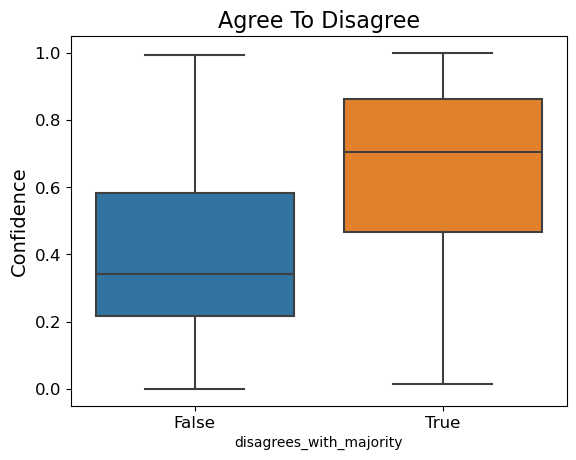

In [159]:
ax = sns.boxplot(data=cartography_df_low_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [160]:
cartography_df_high_conf_in_majority = cartography_df_greater_than_10_anots[cartography_df_greater_than_10_anots['comment_id'].isin(high_confidence_comment_ids)]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

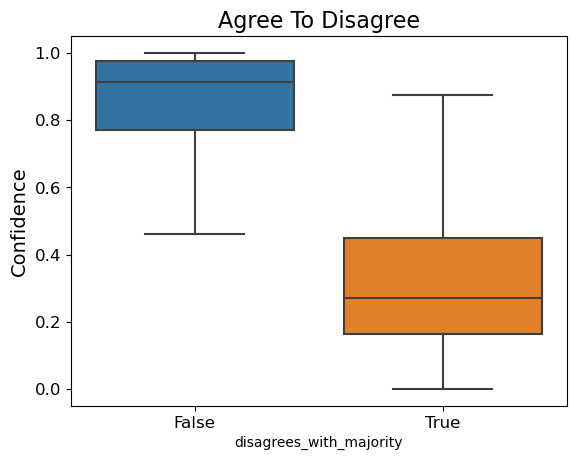

In [161]:
ax = sns.boxplot(data=cartography_df_high_conf_in_majority, x="disagrees_with_majority", y="confidence", showfliers=False)

plt.title("Agree To Disagree", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
# plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)